In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    
np.set_printoptions(precision=5)

Finite Difference Estimator only works if if gets a good guess. 

Thus the estimator will randomly choose parameters until it finds a non-zero gradient estimate. From there we can optimize. 

Additionally the scale of the state space causes weighting issues. Meaning the set of parameters that produce a non-zero gradient with respect to the entire parameter set we are choosing from is rather small. Thus the algorithm is likely to search very long for usefull initial parameters. To compensate for that, one can introduce a scaling variable. In this case it is arbitrary but, it makes sense to obtain it from the state domain.

It still fails sometimes, because the gradient estimates are randomized. A deterministic gradient estimator would solve this issue.

Estimator parameters are pretty arbitrary.

In [2]:
mntcar = envs.GeneralMountainCar()
executer = srb.Rollout(mntcar)
policy_scale = np.array([1,10,100])
estimator = srb.LinearFDEstimator(executer, mntcar, max_it=200, eps=0.01, var = 1, 
                                  parameter_domain=np.array([-2,2]), rate = 0.5)

In [3]:
par, conv = estimator.optimize(policy_scale)

Start Linear Finite Difference optimization:
Initial Parameters: [ 0.70629  0.66668  0.66293]
Run: 0  	Parameter: 	[ 0.70629  0.66668  0.66293]	Reward: -287.5668731977271
		Gradient: 	[-0.13553 -0.28462  0.25635]
Run: 10  	Parameter: 	[ 0.28234 -0.11254  1.22213]	Reward: -190.19762774388695
		Gradient: 	[ 0.00114 -0.04847  0.0138 ]
Run: 20  	Parameter: 	[ 0.52085 -0.2366   1.60542]	Reward: -184.52602800153224
		Gradient: 	[ 0.00491 -0.07974  0.0001 ]
Run: 30  	Parameter: 	[ 1.02317 -0.10825  1.82487]	Reward: -185.36040590470338
		Gradient: 	[-0.01931 -0.07167 -0.00128]
Run: 40  	Parameter: 	[ 0.93032 -0.44348  1.82024]	Reward: -183.36012057935272
		Gradient: 	[-0.01069 -0.06705 -0.00962]
Run: 50  	Parameter: 	[ 1.25168 -0.40197  2.26309]	Reward: -184.71550517578413
		Gradient: 	[-0.0109  -0.05984  0.00486]
Run: 60  	Parameter: 	[ 1.23496 -0.67476  2.26718]	Reward: -184.22981789408925
		Gradient: 	[-0.01314 -0.05698  0.00563]
Run: 70  	Parameter: 	[ 1.57555 -0.55146  2.76804]	Reward: -1

This is the trajectory of the final parameter set.

Final Reward: -183.26577682415376


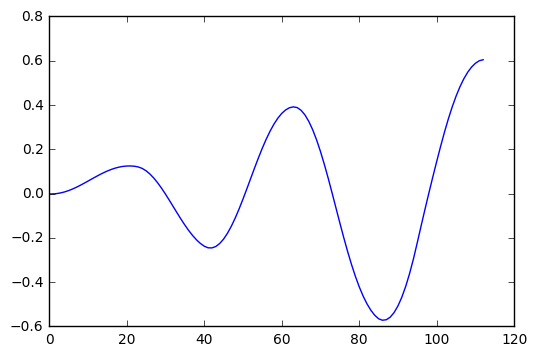

In [4]:
par_policy = lambda parameter: (lambda x: (parameter * policy_scale).dot(np.array([1,x[0],x[1]])))
trace, i, achieved = executer.rollout(par_policy(estimator.best_parameter))

print("Final Reward: "+str(estimator.best_reward))

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()